# Environment Setup

## Import Libraries

In [40]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [41]:
# Importing previous processed and filtered dataset

df = pd.read_pickle('../data/processed/df_filtered.pkl')

In [42]:
# Verifying the loaded dataset

df.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,2002068522,29093,2018-03-26,0,i made it and it was amazing,petit gateau,27,30475,2002-05-21,"['30-minutes-or-less', 'time-to-make', 'course...","[425.4, 49.0, 90.0, 1.0, 15.0, 94.0, 11.0]",19,['break the chocolate and butter into small pi...,this is a terribly easy to make recipe of a de...,"['dark chocolate', 'unsalted butter', 'eggs', ...",7.0
1,2002097693,79222,2018-04-05,0,Do you have cook the potatoes beforehand?,potato crab chowder,45,115419,2003-12-18,"['60-minutes-or-less', 'time-to-make', 'course...","[274.2, 12.0, 15.0, 18.0, 32.0, 22.0, 12.0]",8,['saute onion& garlic in melted butter in larg...,soup for the soul!,"['butter', 'onion', 'garlic', 'potatoes', 'flo...",13.0
2,422608,441096,2016-02-26,5,"I didn&#039;t follow the instructions exactly,...",pumpkin chili,620,31807,2010-11-03,"['course', 'main-ingredient', 'preparation', '...","[322.9, 19.0, 18.0, 19.0, 42.0, 23.0, 11.0]",3,"['combine all ingredients in slow cooker', 'co...",add some fall flavor and some additional nutri...,"['ground beef', 'pumpkin puree', 'kidney beans...",7.0
3,2001891832,183729,2018-04-30,0,There is no cooking temp?????? Love this recip...,spaghetti corn,5,299289,2006-08-29,"['15-minutes-or-less', 'time-to-make', 'main-i...","[412.5, 24.0, 16.0, 20.0, 24.0, 46.0, 19.0]",5,"['mix all ingredients together', 'pour into 9x...",my mom found this in a news paper and decided ...,"['cream-style corn', 'whole kernel corn', 'spa...",5.0
4,2001338551,195977,2017-04-04,0,Have made this cake often. Have added 1 1/2 c ...,st louis style gooey butter cake,50,385857,2006-11-17,"['60-minutes-or-less', 'time-to-make', 'course...","[588.7, 37.0, 279.0, 21.0, 11.0, 57.0, 29.0]",28,"['preheat oven to 350', 'lightly grease one de...",what is gooey butter cake you ask? it is a sup...,"['butter', 'yellow cake mix', 'eggs', 'cream c...",6.0


# Exploratory Data Analysis

## Data Shape Details

In [43]:
# Checking dataset shape

df.shape

(65620, 16)

## Data Information Details

In [44]:
# Viewing dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         65620 non-null  int64         
 1   recipe_id       65620 non-null  int64         
 2   date            65620 non-null  datetime64[ns]
 3   rating          65620 non-null  int64         
 4   review          65456 non-null  object        
 5   name            65620 non-null  object        
 6   minutes         65620 non-null  int64         
 7   contributor_id  65604 non-null  object        
 8   submitted       65620 non-null  datetime64[ns]
 9   tags            65620 non-null  object        
 10  nutrition       65604 non-null  object        
 11  n_steps         65620 non-null  int64         
 12  steps           65620 non-null  object        
 13  description     65620 non-null  object        
 14  ingredients     65620 non-null  object        
 15  n_

## Missing Values Identification

In [45]:
# Checking the dataset for missing values

df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,user_id,0.000000
1,recipe_id,0.000000
2,date,0.000000
3,rating,0.000000
4,name,0.000000
5,minutes,0.000000
6,submitted,0.000000
7,tags,0.000000
8,n_steps,0.000000
9,steps,0.000000


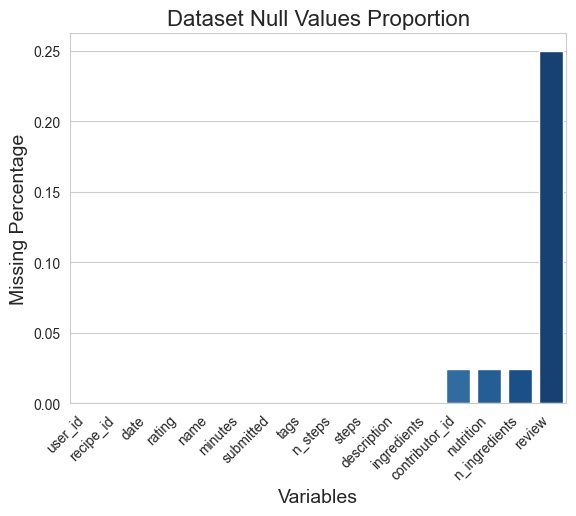

<Figure size 1000x600 with 0 Axes>

In [46]:
# Ploting missing values data


# Set the style
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            palette='Blues')

# Title and labels
plt.title("Dataset Null Values Proportion", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Missing Percentage", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the figure size for better visibility
plt.figure(figsize=(10, 6))

# Show the plot
plt.show()

## Data Visualization

### Ratings Distribution

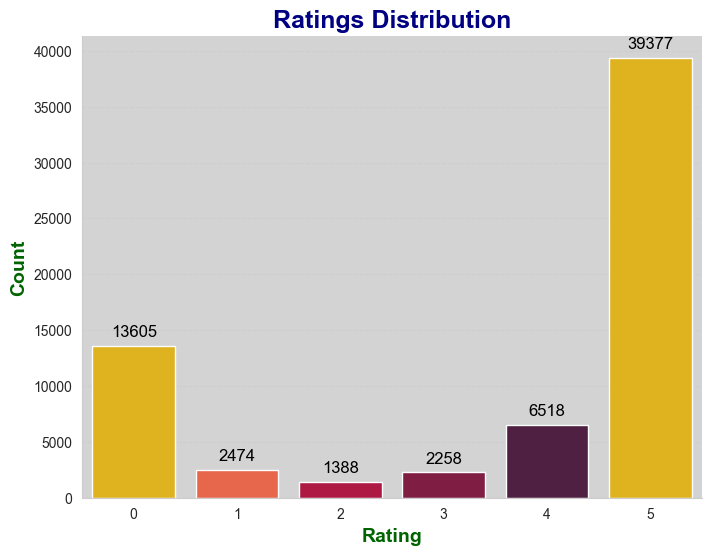

In [47]:


# Define a custom color palette
custom_palette = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']

# Set the style
sns.set_style("whitegrid")

# Adjusting plot size before creating the count plot
plt.figure(figsize=(8, 6))

# Create the count plot with the custom palette
ratings_distribution = sns.countplot(data=df, x="rating", palette=custom_palette)

# Add labels on top of bars with customization
for p in ratings_distribution.patches:
    ratings_distribution.annotate(format(p.get_height(), '.0f'), 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha='center', va='center', 
                                   xytext=(0, 10), 
                                   textcoords='offset points',
                                   fontsize=12,
                                   color='black')

# Title and labels with custom fonts
plt.title("Ratings Distribution", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Rating", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='darkgreen')

# Set background color
plt.gca().set_facecolor('lightgray')

# Add gridlines and remove spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Show the plot
plt.show()

### Top 10 most rated recipes

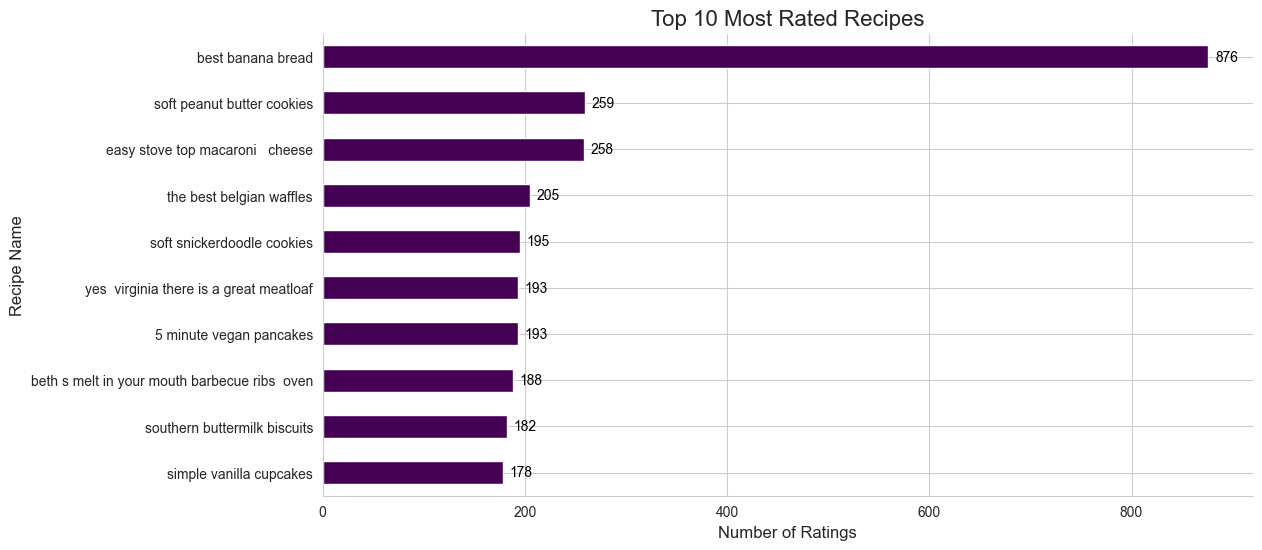

In [48]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Title
plt.title("Top 10 Most Rated Recipes", fontsize=16)

# Plotting the horizontal bar chart with a gradient color palette
ratings_per_recipe = df.groupby("name")["rating"].count().sort_values(ascending=False)
bars = ratings_per_recipe.head(10).plot(kind='barh', cmap='viridis')

# Adding labels to the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_width(), '.0f'), 
                  (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                  ha='left', va='center', 
                  xytext=(5, 0), 
                  textcoords='offset points',
                  fontsize=10,
                  color='black')

# Labeling axes
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Recipe Name", fontsize=12)

# Inverting y-axis for descending order of ratings
plt.gca().invert_yaxis()

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

### Top 10 users with most ratings

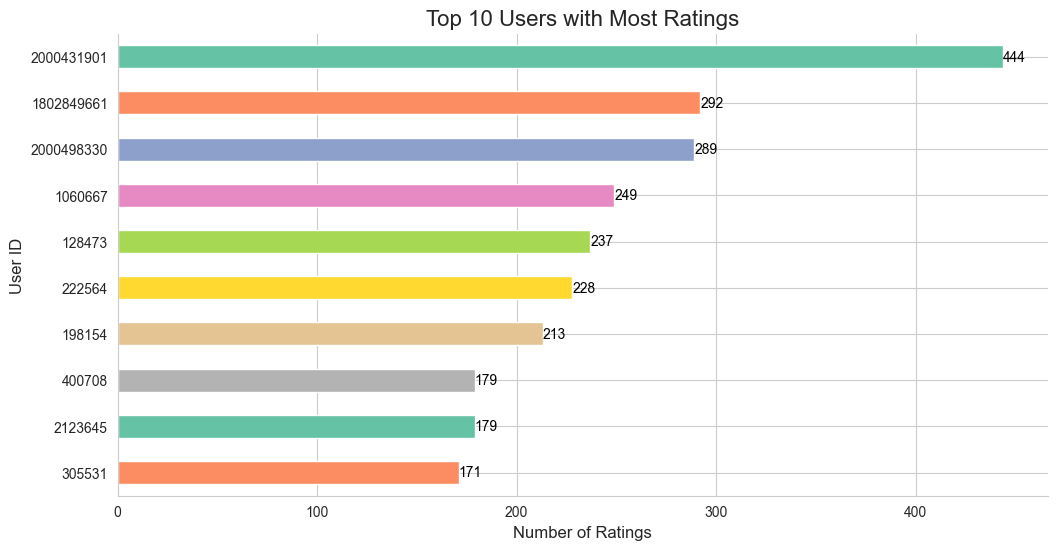

In [49]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Title
plt.title("Top 10 Users with Most Ratings", fontsize=16)

# Plotting the horizontal bar chart with the 'Set2' color palette
ratings_per_user = df.groupby("user_id")["rating"].count().sort_values(ascending=False)
bars = ratings_per_user.head(10).plot(kind='barh', color=sns.color_palette("Set2"))

# Adding labels to the bars
for bar in bars.patches:
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', 
             ha='left', 
             fontsize=10, 
             color='black')

# Labeling axes
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("User ID", fontsize=12)

# Inverting y-axis for descending order of ratings
plt.gca().invert_yaxis()

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

### Distribution of no of ingrediants per recipe

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


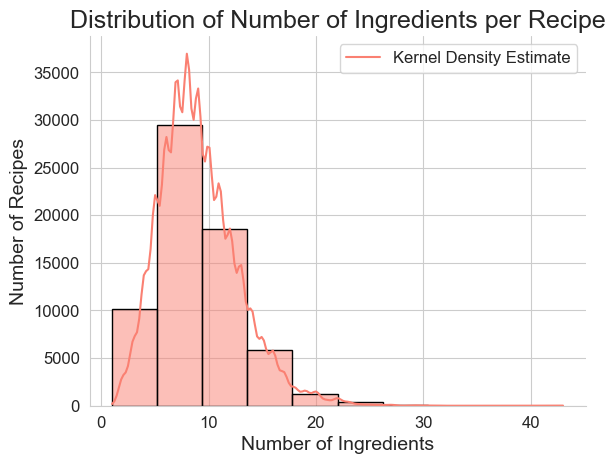

In [50]:

# Style
sns.set_style("whitegrid")

# Create the histogram with a specified color
sns.histplot(df["n_ingredients"], bins=10, kde=True, color='salmon', edgecolor='black', linewidth=1)

# Title and labels with increased font sizes
plt.title("Distribution of Number of Ingredients per Recipe", fontsize=18)
plt.xlabel("Number of Ingredients", fontsize=14)
plt.ylabel("Number of Recipes", fontsize=14)

# Adjusting the tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a legend for clarity
plt.legend(["Kernel Density Estimate"], fontsize=12)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

### Distribution of preparation time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


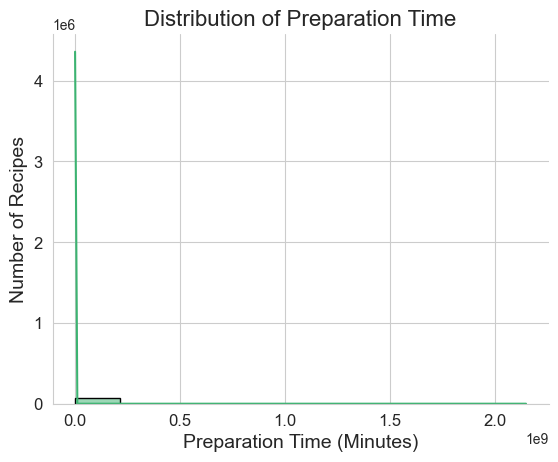

In [51]:
# Set the style
sns.set_style("whitegrid")

# Create the histogram with a green color
sns.histplot(df["minutes"], bins=10, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1)

# Title and labels with increased font sizes
plt.title("Distribution of Preparation Time", fontsize=16)
plt.xlabel("Preparation Time (Minutes)", fontsize=14)
plt.ylabel("Number of Recipes", fontsize=14)

# Adjusting the tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Remove spines
sns.despine()

# Show the plot
plt.show()

### Most common words in reviews

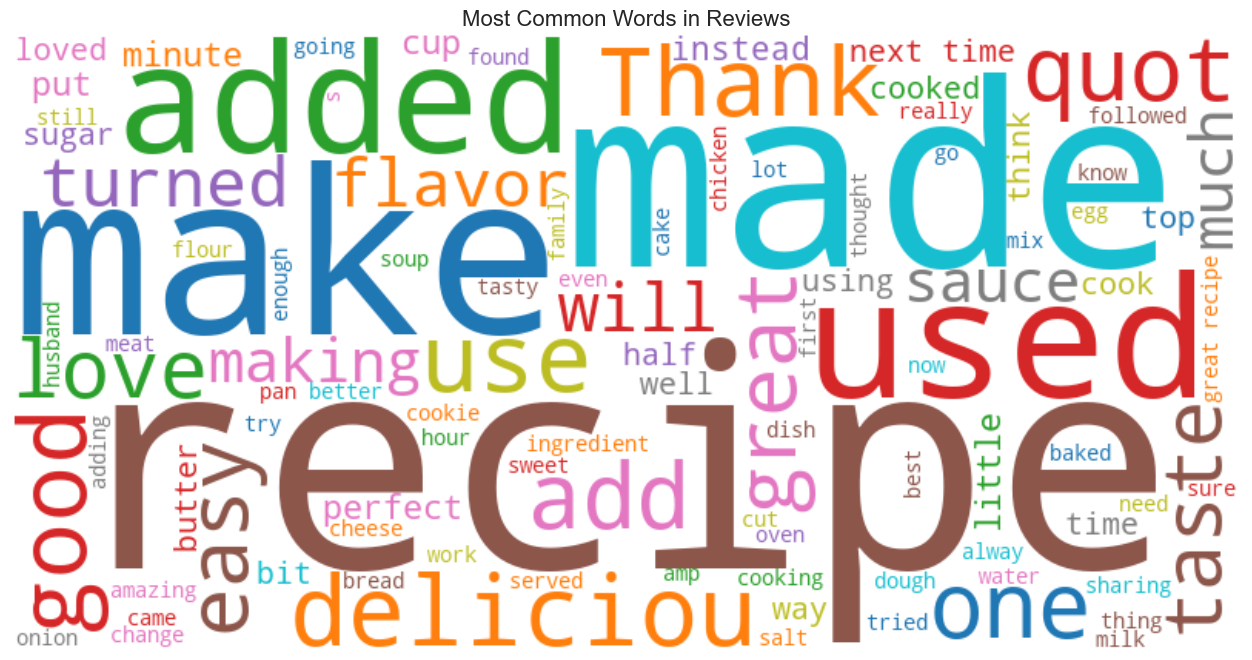

In [52]:
# Concatenate all reviews into a single string
text = ' '.join(df["review"].dropna().tolist())

# Generate word cloud with custom parameters for better resolution
wordcloud = WordCloud(background_color='white', max_words=100, colormap='tab10', width=800, height=400).generate(text)

# Set figure size
plt.figure(figsize=(16, 8))

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words in Reviews", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()

### Most common words in ingrediants

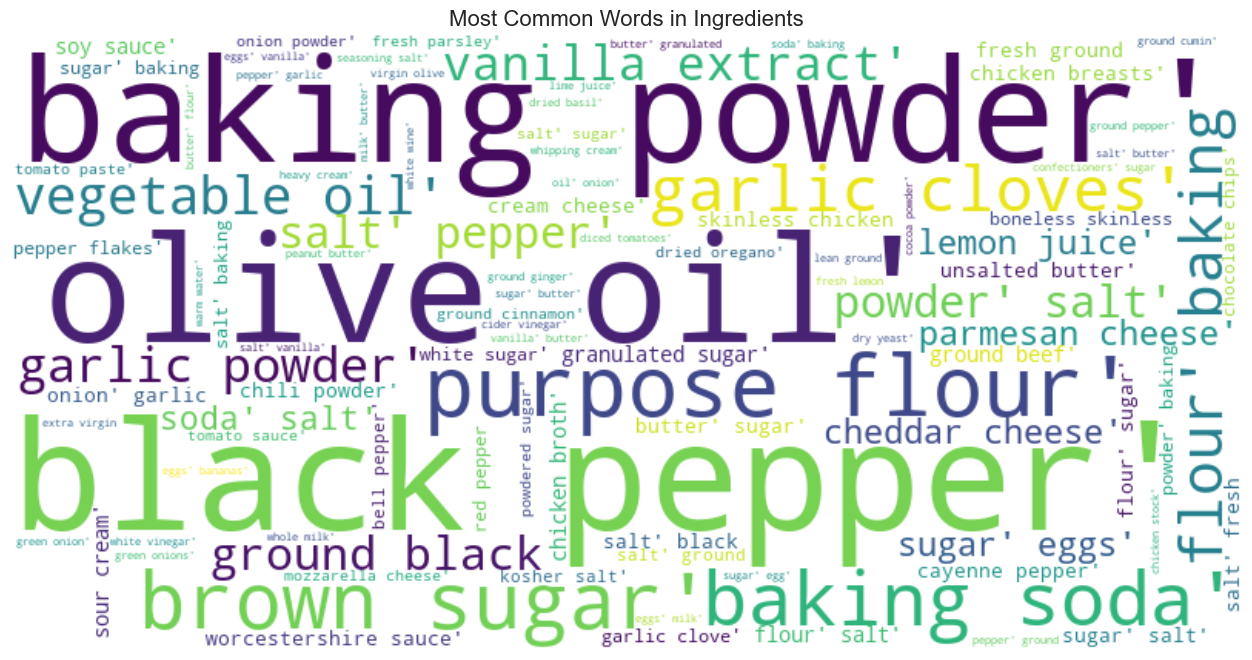

In [53]:
# Concatenate all ingredients into a single string
text = ' '.join(df["ingredients"].dropna().tolist())

# Generate word cloud with custom parameters for better resolution
wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(text)

# Set figure size
plt.figure(figsize=(16, 8))

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words in Ingredients", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()

### Corelation Matrix

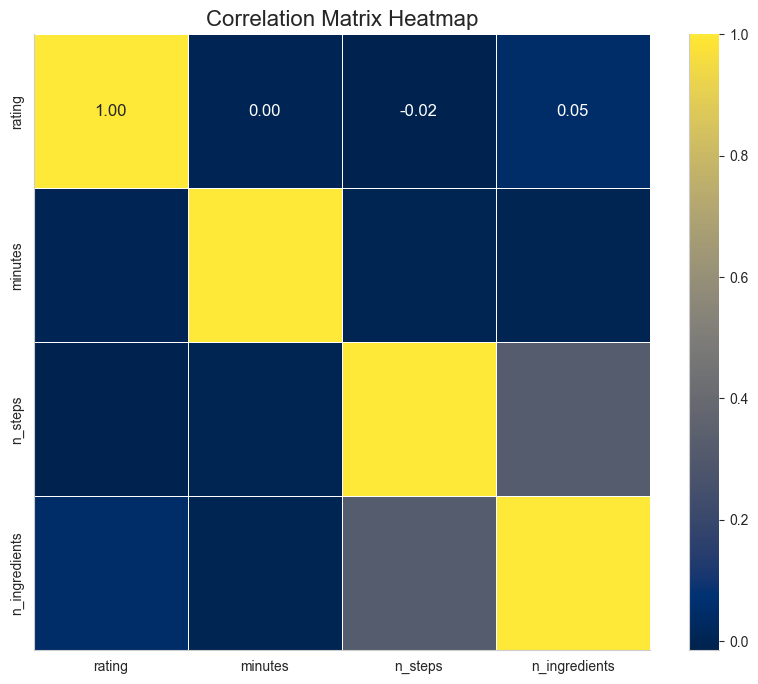

In [54]:


# Compute the correlation matrix
corr_matrix = df[["rating", "minutes", "n_steps", "n_ingredients"]].corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap with annotations and a customized color palette
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt=".2f", annot_kws={"size": 12}, linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Remove the top and right spines
sns.despine()

# Adjust the aspect ratio for better aesthetics
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

# Data Pre-Processing

## Split data into train & test set

In [55]:
# Splitting data into test and train set

users_with_one_rating = df["user_id"].value_counts(
)[df["user_id"].value_counts() == 1].index
df_filtered = df[~df["user_id"].isin(users_with_one_rating)]
train, test = train_test_split(
    df_filtered, test_size=0.3, random_state=777, stratify=df_filtered["user_id"])

In [56]:
# Viewing test and train set shapes

train.shape, test.shape

((13663, 16), (5856, 16))

## Export train & test data

In [57]:
# Exporting test and train data set

train.to_pickle('../data/processed/train.pkl')
test.to_pickle('../data/processed/test.pkl')